In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
fr_df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7', sep=";", header=0)
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13032 entries, 0 to 13031
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     13029 non-null  object
 1   sexe    13032 non-null  int64 
 2   jour    13032 non-null  object
 3   hosp    13032 non-null  int64 
 4   rea     13032 non-null  int64 
 5   rad     13032 non-null  int64 
 6   dc      13032 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 712.8+ KB


In [3]:
delete2A2B = fr_df[(fr_df['dep'] == "2A")|(fr_df['dep'] == "2B")].index
fr_df.drop(delete2A2B , inplace=True)
fr_df['dep'] = fr_df['dep'].fillna(0).astype(np.int64)
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 0 to 13031
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     12774 non-null  int64 
 1   sexe    12774 non-null  int64 
 2   jour    12774 non-null  object
 3   hosp    12774 non-null  int64 
 4   rea     12774 non-null  int64 
 5   rad     12774 non-null  int64 
 6   dc      12774 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 798.4+ KB


In [4]:
idf_df = fr_df[(fr_df['dep']==75) | (fr_df['dep']==77) | (fr_df['dep']==78) | (fr_df['dep']==91) | (fr_df['dep']==92) | (fr_df['dep']==93) | (fr_df['dep']==94) | (fr_df['dep']==95)]
idf_df = idf_df.reset_index(drop=True)
idf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     1032 non-null   int64 
 1   sexe    1032 non-null   int64 
 2   jour    1032 non-null   object
 3   hosp    1032 non-null   int64 
 4   rea     1032 non-null   int64 
 5   rad     1032 non-null   int64 
 6   dc      1032 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 56.6+ KB


In [5]:
idf_df.head()

dep  sexe        jour  hosp  rea  rad  dc
0   75     0  2020-03-18   359  105   40  14
1   75     1  2020-03-18   217   70   22  10
2   75     2  2020-03-18   139   35   18   4
3   77     0  2020-03-18    25   13   10   0
4   77     1  2020-03-18    15   12    6   0

In [6]:
cumulative=idf_df[(idf_df['sexe']!=0)].index
idf_df.drop(cumulative, inplace=True)
idf_df = idf_df.reset_index(drop=True)
idf_df['dep'] = idf_df['dep'].astype('category')
idf_df.head()

dep  sexe        jour  hosp  rea  rad  dc
0  75     0  2020-03-18   359  105   40  14
1  77     0  2020-03-18    25   13   10   0
2  78     0  2020-03-18    69   18    5   5
3  91     0  2020-03-18    51   16    0   1
4  92     0  2020-03-18   149   48   22   4

In [7]:
dc=idf_df['dc']
hosp=idf_df['hosp']
idf_df = idf_df.assign(dcperhosp=pd.Series(np.divide(dc,hosp)*100))
idf_df.head()

dep  sexe        jour  hosp  rea  rad  dc  dcperhosp
0  75     0  2020-03-18   359  105   40  14   3.899721
1  77     0  2020-03-18    25   13   10   0   0.000000
2  78     0  2020-03-18    69   18    5   5   7.246377
3  91     0  2020-03-18    51   16    0   1   1.960784
4  92     0  2020-03-18   149   48   22   4   2.684564

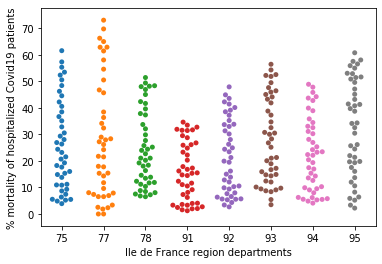

In [8]:
_=sns.swarmplot(x='dep', y='dcperhosp', data=idf_df)
_=plt.xlabel('Ile de France region departments')
_=plt.ylabel('% mortality of hospitalized Covid19 patients')

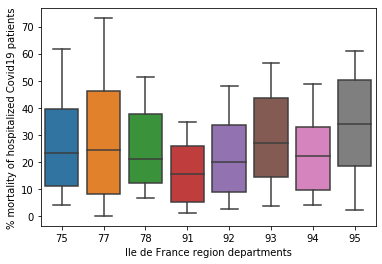

In [9]:
_=sns.boxplot(x='dep', y='dcperhosp', data=idf_df)
_=plt.xlabel('Ile de France region departments')
_=plt.ylabel('% mortality of hospitalized Covid19 patients')

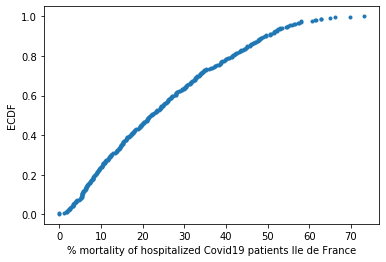

In [10]:
x=np.sort(idf_df['dcperhosp'])
y=np.arange(1, len(x)+1)/len(x)
_=plt.plot(x, y, marker='.', linestyle='none')
_=plt.xlabel('% mortality of hospitalized Covid19 patients Ile de France')
_=plt.ylabel('ECDF')